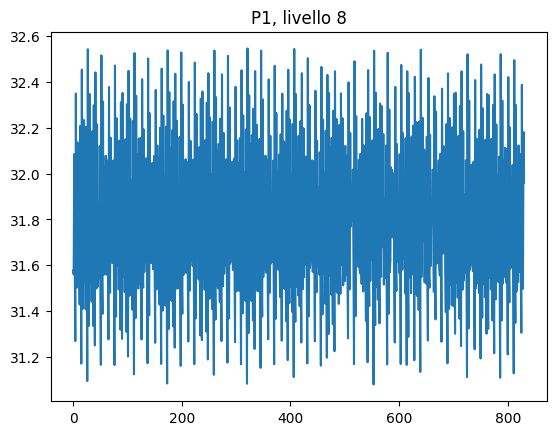

In [5]:
# PLOT DEI GRAFICI
from matplotlib import pyplot as plt
import pandas as pd
from pywt import Wavelet, wavedec
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
X=df[["P1","P2","P3","P4","P5","P6","P7"]]
X = X["P1"]
X_dwt = wavedec(X, 'db1',level = 8)
plt.title("P1, livello 8")
plt.plot(X_dwt[0])

In [26]:
# CROSS VALIDATION
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
#df = df.head(400)
condition_mapping = {'Normal': 0, 'Fault': 1, 'Anomaly': 1}
# 0=normal 1=SV e 2=BUBBLE
df['Condition'] = df['Condition'].map(condition_mapping)
X=df[["P1","P2","P3","P4","P5","P6","P7"]]
y = df['Condition']

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Set up k-fold cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(rf_classifier, X, y, cv=k_fold, scoring='accuracy')

# Print the cross-validation results
print("Cross-validation results:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())

Cross-validation results: [0.93374259 0.93306049 0.93449371 0.93207103 0.93458779]
Mean accuracy: 0.9335911240593395


In [33]:
# HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
condition_mapping = {'Normal': 0, 'Fault': 1, 'Anomaly': 1}
df['Condition'] = df['Condition'].map(condition_mapping)
X=df[["P1","P2","P3","P4","P5","P6","P7"]]
y = df['Condition']


# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy
print("Best parameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

# Use the best parameters to train your final model
best_rf_classifier = RandomForestClassifier(**grid_search.best_params_)
best_rf_classifier.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_rf_classifier.score(X_test, y_test)
print("Test accuracy: ", test_accuracy)


Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy:  0.9214281964448299
Test accuracy:  0.9346363721892934


In [3]:
# ALLENAMENTO SENZA DWT
import numpy as np
import pywt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
#df = df.groupby('Case').head(400)

x_test=pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_test_finale.csv")
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
condition_mapping = {'Normal': 0, 'Fault': 1, 'Anomaly':1}
df['Condition'] = df['Condition'].map(condition_mapping)
#ALLENAMENTO MODELLO
# Creazione di un DataFrame con le features e il target
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
colonna = x_test[["Case"]]
X=df[["P1","P2","P3","P4","P5","P6","P7"]]
y = df['Condition']
# Creazione e addestramento del modello
model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
model.fit(X, y)
predictions = model.predict(test)
test['Prediction'] = predictions
df_unito = pd.concat([colonna, test], axis=1)
grouped_data = df_unito.groupby('Case')['Prediction'].apply(lambda x: x.mode().iat[0]).reset_index() # restituisce il valore più frequente (moda)
grouped_data

C:\Users\umber\AppData\Local\Temp\ipykernel_18596\701231514.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = predictions


,Case,Prediction
0,178,1
1,179,1
2,180,0
3,181,0
4,182,0
5,183,0
6,184,1
7,185,0
8,186,1
9,187,0


In [1]:
# ALLENAMENTO CON DWT
import numpy as np
import pywt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import classification_report
df = pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_train_finale.csv")
#df = df.groupby('Case').head(400)

x_test=pd.read_csv(r"C:\Users\umber\Desktop\MANUTENZIONE\dataset_test_finale.csv")
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
df = df[["Case","Condition","P1","P2","P3","P4","P5","P6","P7"]]
condition_mapping = {'Normal': 0, 'Fault': 1, 'Anomaly':1}
df['Condition'] = df['Condition'].map(condition_mapping)
#ALLENAMENTO MODELLO
# Creazione di un DataFrame con le features e il target
test = x_test[["P1","P2","P3","P4","P5","P6","P7"]]
colonna = x_test[["Case"]]
X=df[["P1","P2","P3","P4","P5","P6","P7"]]
y = df['Condition']
X_dwt = np.concatenate(pywt.wavedec(X, 'db1',level = 12), axis=-1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_dwt)
# Creazione e addestramento del modello
model = RandomForestClassifier(max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state=42)
model.fit(X_train_scaled, y)

X_test_dwt = np.concatenate(pywt.wavedec(test, 'db1',level = 12), axis=-1)
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test_dwt)

predictions = model.predict(X_test_scaled)
test['Prediction'] = predictions
df_unito = pd.concat([colonna, test], axis=1)
grouped_data = df_unito.groupby('Case')['Prediction'].apply(lambda x: x.mode().iat[0]).reset_index() # restituisce il valore più frequente (moda)
grouped_data

c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 12 is too high: all coefficients will experience boundary effects.
  warnings.warn(
c:\Users\umber\AppData\Local\Programs\Python\Python38\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 12 is too high: all coefficients will experience boundary effects.
  warnings.warn(
C:\Users\umber\AppData\Local\Temp\ipykernel_14792\3097512641.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Prediction'] = predictions


,Case,Prediction
0,178,1
1,179,1
2,180,0
3,181,0
4,182,0
5,183,0
6,184,1
7,185,0
8,186,1
9,187,0
